# MovieLens Dataset
Source: https://files.grouplens.org/datasets/movielens/ml-25m-README.html

About the dataset: https://files.grouplens.org/datasets/movielens/ml-25m-README.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## movies.csv
Variables:
- movieId (integer)
- title (string) -> year is in brackets behind
- genres (string) -> multiple genres separated by |

In [2]:
movies = pd.read_csv("../ml-25m/movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [3]:
# strip white spaces from strings
movies["title"] = movies["title"].str.strip()
movies["genres"] = movies["genres"].str.strip()

In [4]:
movies.isnull().values.any()

False

In [5]:
# extract movie year from title as new column
movies["year"] = movies["title"].str.extract("(\(\d{4}\))$")
# movies["year"] = movies["title"].str[-6:]
movies["year"] = movies["year"].str[1:5]

In [6]:
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001


### Movie release year

In [7]:
movies["year"].unique()

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1990', '1991', '1989', '1937',
       '1940', '1969', '1981', '1973', '1970', '1960', '1955', '1959',
       '1968', '1980', '1975', '1986', '1948', '1943', '1950', '1946',
       '1987', '1997', '1974', '1956', '1958', '1949', '1972', '1998',
       '1933', '1952', '1951', '1957', '1961', '1954', '1934', '1944',
       '1963', '1942', '1941', '1953', '1939', '1947', '1945', '1938',
       '1935', '1936', '1926', '1932', '1985', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '2005', '2006', '1902', '1903', '2007',
       '2008', '2009', '1912', '2010', nan, '1913', '2011', '1898',
       '1899', '1894', '2012', '1910', '2013', '1896', '2014', '2015',
       '1

In [8]:
movies[movies["year"].isna()] # movies without year labelled

,movieId,title,genres,year
15036,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,NaN
18789,98063,Mona and the Time of Burning Love (Mona ja pal...,Drama,NaN
25387,123619,Terrible Joe Moran,(no genres listed),NaN
26284,125571,The Court-Martial of Jackie Robinson,(no genres listed),NaN
26309,125632,In Our Garden,(no genres listed),NaN
...,...,...,...,...
62071,207714,Tales of Found Footage,(no genres listed),NaN
62104,207884,Enduring Destiny,(no genres listed),NaN
62285,208597,Punk the Capital: Building a Sound Movement,Documentary,NaN
62326,208763,Yosemite: The Fate of Heaven,(no genres listed),NaN


In [9]:
movies["year"].value_counts()

2015    2513
2016    2488
2014    2406
2017    2374
2013    2173
        ... 
1883       1
1887       1
1874       1
1878       1
1880       1
Name: year, Length: 135, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

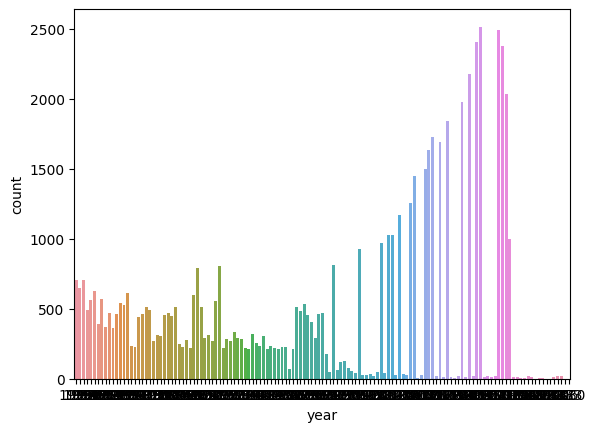

In [10]:
sns.countplot(x="year", data=movies)

### Movie genres
Genres for this dataset: Action, Adventure, Animation, Children's, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

If there are no genres listed for the movie: (no genres listed)

In [11]:
movies[movies["genres"] == "(no genres listed)"]

,movieId,title,genres,year
15881,83773,Away with Words (San tiao ren) (1999),(no genres listed),1999
16060,84768,Glitterbug (1994),(no genres listed),1994
16351,86493,"Age of the Earth, The (A Idade da Terra) (1980)",(no genres listed),1980
16491,87061,Trails (Veredas) (1978),(no genres listed),1978
17404,91246,Milky Way (Tejút) (2007),(no genres listed),2007
...,...,...,...,...
62400,209101,Hua yang de nian hua (2001),(no genres listed),2001
62401,209103,Tsar Ivan the Terrible (1991),(no genres listed),1991
62407,209133,The Riot and the Dance (2018),(no genres listed),2018
62415,209151,Mao Zedong 1949 (2019),(no genres listed),2019


There are 5062 movies with no genres listed

In [12]:
# spread of movie genres

## ratings.csv
Variables:
- userId (integer)
- movieId (integer)
- rating (float)
- timestamp (integer) -> seconds since midnight of UTC timezone

In [13]:
ratings = pd.read_csv("../ml-25m/ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [14]:
ratings["datetime"] = pd.to_datetime(ratings["timestamp"], unit="s") # format timestamp to datetime
ratings["year"] = pd.DatetimeIndex(ratings["datetime"]).year # extract year from datetime

### Spread of year ratings were made

In [15]:
ratings["year"].value_counts()

2016    1757440
2000    1735398
2017    1689935
2005    1613550
2015    1604971
1996    1430093
2018    1310761
2019    1200634
1999    1059080
2001    1058750
2004    1048116
2006    1038458
2008    1018001
2007     931432
2003     920295
2009     810127
2010     792436
2002     776654
2011     676498
2012     635208
1997     626202
2013     515684
2014     478270
1998     272099
1995          3
Name: year, dtype: int64

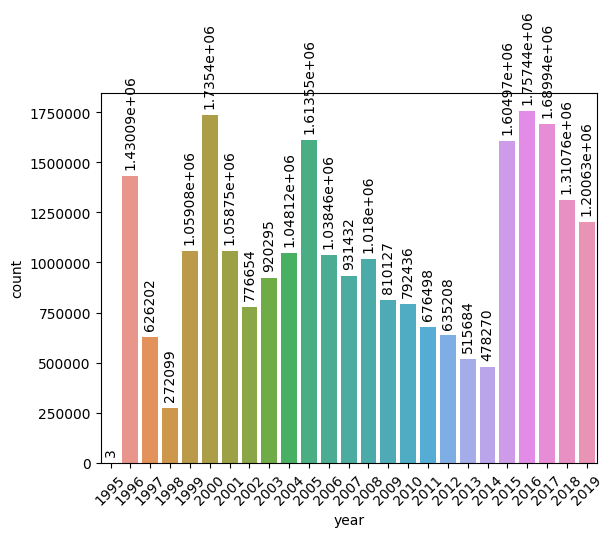

In [16]:
rating_year_spread = sns.countplot(x="year", data=ratings)
plt.ticklabel_format(style='plain', axis='y')
rating_year_spread.bar_label(rating_year_spread.containers[0], rotation="vertical", padding=5)
rating_year_spread.set_xticklabels(rating_year_spread.get_xticklabels(), rotation=45)
None

In [17]:
ratings

,userId,movieId,rating,timestamp,datetime,year
0,1,296,5.0,1147880044,2006-05-17 15:34:04,2006
1,1,306,3.5,1147868817,2006-05-17 12:26:57,2006
2,1,307,5.0,1147868828,2006-05-17 12:27:08,2006
3,1,665,5.0,1147878820,2006-05-17 15:13:40,2006
4,1,899,3.5,1147868510,2006-05-17 12:21:50,2006
...,...,...,...,...,...,...
25000090,162541,50872,4.5,1240953372,2009-04-28 21:16:12,2009
25000091,162541,55768,2.5,1240951998,2009-04-28 20:53:18,2009
25000092,162541,56176,2.0,1240950697,2009-04-28 20:31:37,2009
25000093,162541,58559,4.0,1240953434,2009-04-28 21:17:14,2009


## genome-tags.csv
Variables:
- tagId (integer)
- tag (text)

In [18]:
genome_tags = pd.read_csv("../ml-25m/genome-tags.csv")
genome_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


## genome-scores.csv
Variables:
- movieId (integer)
- tagId (integer)
- relevance (float) -> score for relevance of tag to the movie

Each movie has a score for every tag

In [19]:
genome_scores = pd.read_csv("../ml-25m/genome-scores.csv")
genome_scores

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


### Mean tag relevance score for tags across all movies

In [20]:
tag_mean_scores = genome_scores[["tagId", "relevance"]].groupby(["tagId"]).mean()
tag_mean_scores.reset_index(inplace=True)
tag_mean_scores = tag_mean_scores.merge(genome_tags, how="inner", on="tagId")
tag_mean_scores.sort_values("relevance", ascending=False, inplace=True)
tag_mean_scores

,tagId,relevance,tag
741,742,0.724424,original
645,646,0.541578,mentor
187,188,0.476752,catastrophe
467,468,0.475400,great ending
971,972,0.450228,storytelling
...,...,...,...
975,976,0.007379,studio ghibli
572,573,0.007345,james bond
116,117,0.007059,batman
118,119,0.005523,beatles


## tags.csv

In [21]:
tags = pd.read_csv("../ml-25m/tags.csv")
tags

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181


## links.csv

Variables:

In [22]:
links = pd.read_csv("../ml-25m/links.csv")
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0
